# Titanic

In this notebook we predict survival for passengers from the titanic data available here:
https://www.kaggle.com/competitions/titanic/data




# Table of Contents
1. [Chapter 0-2 - Import libraries and data](#ch1)
1. [Chapter 3 - Data preperation](#ch2)
1. [Chapter 4 - Data exploration](#ch4)
1. [Chapter 5 - Model fitting](#ch5)
1. [Chapter 6 - Conclusion](#ch6)











------------------------------------------------------------------------------------------------------------------------

# Framework

### 1. The Problem

The goal of this project is to create a classification algorithm that accurately predicts whether a passengere survived or not in the titanic. We get information about Passengers from the Titanic and we can use this information to predict survival (1/0). 

### 2. Data Gathering

The data is provided from Kaggle and is available here:
https://www.kaggle.com/competitions/titanic/data


### 3. Data preperation

For this dataset we want to: 

- Check for missing data and input if there is missingness
- Exctract new features
- Transform categorical variables

### 4. Perform exploratory analysis

Here we want to explore the available variables and get some insight into what variables could be a good predictor for survival on the titanic.

### 5. Modelling

Create a model that is good for classification:

- Logistic regression
- Random Forest
- Gradient boosting

### 6. Validate the model

Here we validate the model by uploading the data on Kaggle and see how well our model performs on "unseen" data. 


### 7. Optimize

Is there any way to make this process faster. Could this all be implemented in a pipeline?


# 0-2. Import libraries and read in data

In [104]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection


#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

In [105]:
# Read in data
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

# Set together to loop through when doing data wrangling
# Certain that both datasets will go through the same preprocessing steps
datasets = [train,test]

# 3. Data preperation

## 3.1 Data Information

In [106]:
# Print column names and datatypes
print(train.columns)
print(train.dtypes)
train.head()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Here is the description of the columns above.

> - `PassengerId`: Is a specific PassangerId and is coded as int. Unique for each passanger. 
> - `Survived`: Is our response variable and is coded as 1 (survived) and 0 for not survived.
> - `Pclass`: Is the passanger class 1st class, 2nd class or 3rd class. Coded as int.
> - `Name`: Is the name of the passenger, coded as a string.
> - `Sex`: Is the gender of the passenger. Represented as male/female
> - `Age`: Is the age of the passenger, represented as float.
> - `SibSp`: Number of siblings or spouses on the titanic
> - `Parch`: Number of parents or children aboard the titanic.
> - `Ticket`: Ticket number.
> - `Fare`: Passanger fare. Float
> - `Cabin`: Cabin number
> - `Embarked`: Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

We decide to drop Name, Ticket number and cabin number.




In [107]:
drop_columns = ['Name','Ticket','Cabin']
train.drop(drop_columns, axis=1, inplace=True)
test.drop(drop_columns, axis=1, inplace=True)

# Set together to loop through when doing data wrangling
datasets = [train,test]

## 3.2 Data Cleaning: Correcting, Completing, Creating, and Converting


Here we start working with our data. 

Objectives: 

- [x] Input missing values for Age
- [x] Input missing values for Embarked
- [x] Input missing values for Fare
- [x] Sex variable as numeric (created isMale (1/0))
- [x] Embarked as categorical
- [x] Create isAlone from SibSp and Parch as a binary 1/0



#### Missing values
- Age: Missing values for the age variable we use the median age based on other correlated variables (Sex and Pclass).+
- Embarked: Missing values for the Embarked variable were inputed with the mode (Most frequent category) from the training set.
- Fare: Missing values for the Fare variable were inputed with the median from the training set.




### 3.2.1 Correcting

The output below shows no obvious outliers or mistake in the data. No further steps are needed here at the moment.

In [108]:
train.describe(include = 'all')

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889
unique,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,NaN,577,NaN,NaN,NaN,NaN,644
mean,446.000000,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN
std,257.353842,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN
min,1.000000,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,223.500000,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN
50%,446.000000,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN
75%,668.500000,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN


### 3.2.2 Completing

Missingness is present in both the training dataset and the test set. 

- Age will be imputed based on Sex and Pclass

In [109]:
# Check for columns with missing values
print(train.isnull().sum())
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64
PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64


In [110]:
# Input missing values for Age, Embarked and Fare

# Compute the unique values for sex and Pclass
Sex_val = train['Sex'].unique()
Pclass_val = train['Pclass'].unique()

for dataset in datasets:
    # Loop through values for sex and class
    for sex in Sex_val:
        for Class in Pclass_val:

            # Compute the median age for the classification of sex and pclass
            median_age = train[(train['Sex'] == sex) & \
                                      (train['Pclass'] == Class)]['Age'].dropna().median()

            # Assign the median value for each of them
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == sex) & (dataset.Pclass == Class),\
                        'Age'] = median_age
        
    # Embarked column
    # Assign the mode value from the train set
    dataset.loc[(dataset.Embarked.isnull()),'Embarked'] = train['Embarked'].mode()[0]   
    
    # Fare column
    # Assign the median fare value to the missing values
    dataset.loc[(dataset.Fare.isnull()),'Fare'] = train['Fare'].median()

### 3.2.3 Creating

Here we will create new variables:

- Family size from Parch and SibSp
- Is Alone
- Is Child

In [111]:
# Loop through both datasets
for dataset in datasets:
    # Family size, Is alone, is child and farebin
    dataset['FamilySize'] = dataset['Parch'] + dataset['SibSp']
    dataset['isAlone'] = np.where((dataset['Parch'] == 0) & (dataset['SibSp'] == 0), 1,0)
    dataset['isChild'] = np.where((dataset['Age'] <= 18),1,0)
    
# Preview data again
train.info()
test.info()
train.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
 9   FamilySize   891 non-null    int64  
 10  isAlone      891 non-null    int64  
 11  isChild      891 non-null    int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,isAlone,isChild
597,598,0,3,male,49.0,0,0,0.0000,S,0,1,0
560,561,0,3,male,25.0,0,0,7.7500,Q,0,1,0
738,739,0,3,male,25.0,0,0,7.8958,S,0,1,0
100,101,0,3,female,28.0,0,0,7.8958,S,0,1,0
465,466,0,3,male,38.0,0,0,7.0500,S,0,1,0
177,178,0,1,female,50.0,0,0,28.7125,C,0,1,0
293,294,0,3,female,24.0,0,0,8.8500,S,0,1,0
713,714,0,3,male,29.0,0,0,9.4833,S,0,1,0
413,414,0,2,male,30.0,0,0,0.0000,S,0,1,0
777,778,1,3,female,5.0,0,0,12.4750,S,0,1,1


In [112]:
# Create a ordinal variable from Fare
train['FareBand'] = pd.qcut(train['Fare'], 4)
train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [113]:
for dataset in datasets:
    dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

### 3.2.4 Converting

In [119]:
# Here we create the dummie variables for the training set
train2 = pd.get_dummies(train)

# Create the same dummie variables for the test set
# Use reindex to keep the same categories as in the train set
test2 = pd.get_dummies(test)
test2 = test2.reindex(columns = train2.columns, fill_value=0)

In [120]:
test2.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,isAlone,isChild,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,"FareBand_(-0.001, 7.91]","FareBand_(7.91, 14.454]","FareBand_(14.454, 31.0]","FareBand_(31.0, 512.329]"
0,892,0,3,34.5,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0
1,893,0,3,47.0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0
2,894,0,2,62.0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0
3,895,0,3,27.0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0
4,896,0,3,22.0,1,1,1,2,0,0,1,0,0,0,1,0,0,0,0


# 4. Data Exploration

Here we want to look into which variables have the highest correlation to survival:

- Compute probabilities for each variable
- Plot count plots for discrete variables
- Plot density plot for Age

In [74]:
#Discrete Variable Correlation by Survival using
#group by aka pivot table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html
for x in ['Sex','Pclass','Embarked','isAlone','isChild','Fare']:
    if train[x].dtype != 'float64' :
        print('Survival Correlation by:', x)
        print(train[[x, 'Survived']].groupby(x, as_index=False).mean())
        print('-'*10, '\n')
        

Survival Correlation by: Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908
---------- 

Survival Correlation by: Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
---------- 

Survival Correlation by: Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009
---------- 

Survival Correlation by: isAlone
   isAlone  Survived
0        0  0.505650
1        1  0.303538
---------- 

Survival Correlation by: isChild
   isChild  Survived
0        0  0.361702
1        1  0.503597
---------- 

Survival Correlation by: Fare
   Fare  Survived
0     0  0.197309
1     1  0.308756
2     2  0.445415
3     3  0.581081
---------- 



<AxesSubplot:xlabel='FamilySize', ylabel='Count'>

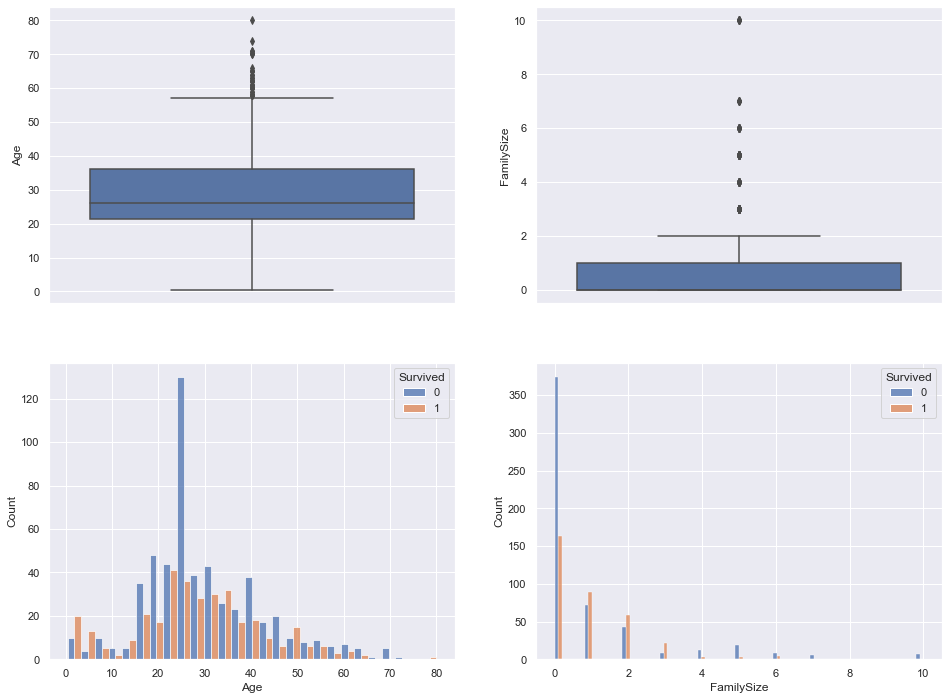

In [75]:
# Set the theme and create the figure
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize': (16, 12)}) 

#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2)

#create boxplot in each subplot
sns.boxplot(data=train, y='Age', ax=axes[0,0])
sns.boxplot(data=train, y='FamilySize', ax=axes[0,1])
sns.histplot(data=train, x='Age',hue="Survived", ax=axes[1,0],multiple = "dodge")
sns.histplot(data=train, x='FamilySize',hue="Survived", ax=axes[1,1],multiple = "dodge")

<AxesSubplot:xlabel='Embarked', ylabel='count'>

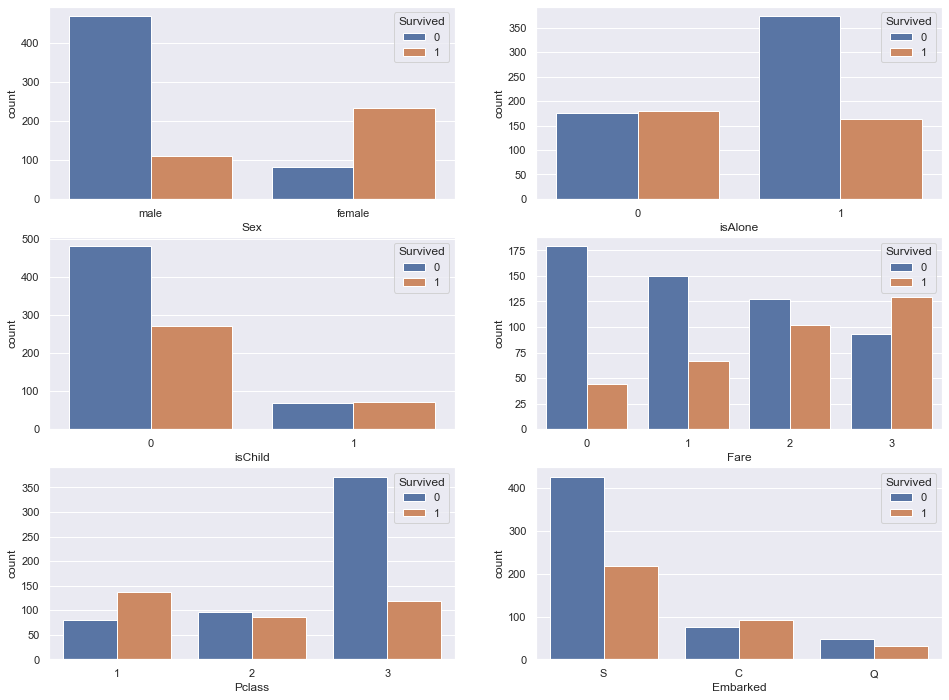

In [76]:
#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(3, 2)

# Compute countplots
sns.countplot(data=train, x="Sex",hue="Survived", ax= axes[0,0])
sns.countplot(data=train, x="isAlone",hue="Survived", ax= axes[0,1])
sns.countplot(data=train, x="isChild",hue="Survived", ax= axes[1,0])
sns.countplot(data=train, x="Fare",hue="Survived", ax= axes[1,1])
sns.countplot(data=train, x="Pclass",hue="Survived", ax= axes[2,0])
sns.countplot(data=train, x="Embarked",hue="Survived", ax= axes[2,1])


<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

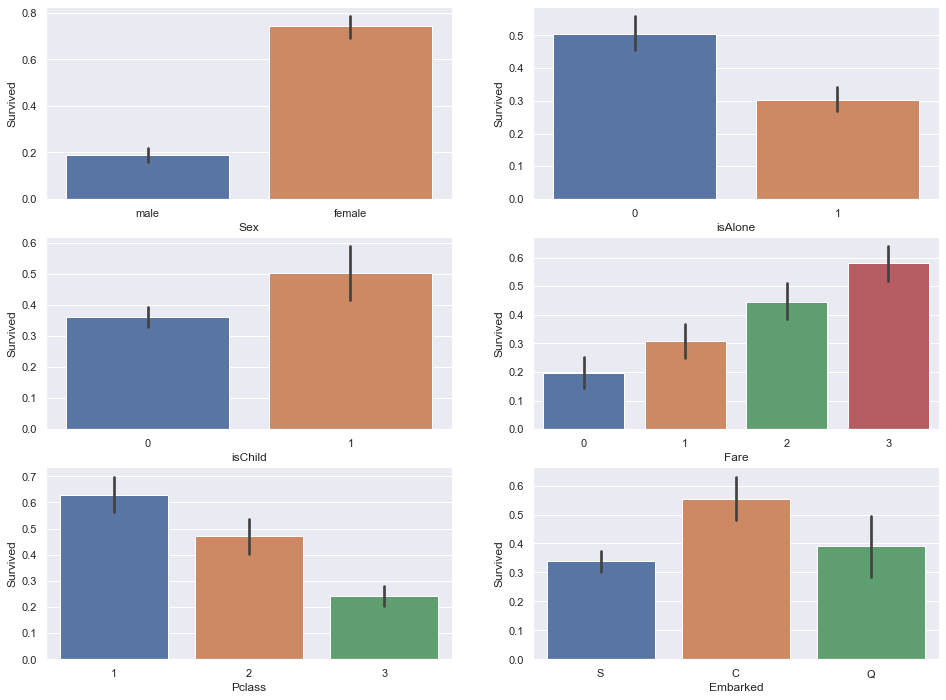

In [77]:
#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(3, 2)

# Compute barplots
sns.barplot(data=train, x="Sex",y="Survived", ax= axes[0,0])
sns.barplot(data=train, x="isAlone",y="Survived", ax= axes[0,1])
sns.barplot(data=train, x="isChild",y="Survived", ax= axes[1,0])
sns.barplot(data=train, x="Fare",y="Survived", ax= axes[1,1])
sns.barplot(data=train, x="Pclass",y="Survived", ax= axes[2,0])
sns.barplot(data=train, x="Embarked",y="Survived", ax= axes[2,1])

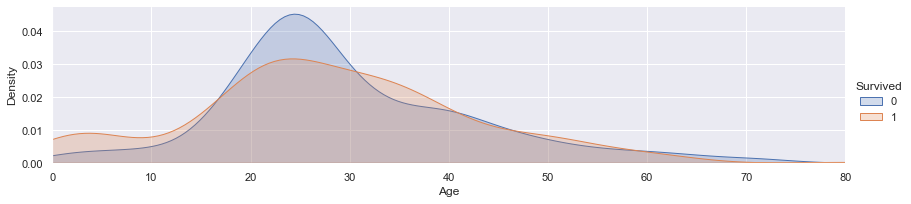

In [78]:
# Plot distributions of age of passengers who survived or did not survive
a = sns.FacetGrid(train, hue = 'Survived', aspect=4)
a.map(sns.kdeplot, 'Age', shade= True)
a.set(xlim=(0 , train['Age'].max()))
a.add_legend()

# 5. Model


Here we want to fit the models:

- [ ] Logistic Regression



In [121]:
X_train = train2[['Sex_male','isAlone','isChild','Embarked_Q','Embarked_S','Fare','Pclass']]
Y_train = train2['Survived']
X_test  = test2[['Sex_male','isAlone','isChild','Embarked_Q','Embarked_S','Fare','Pclass']]
X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

In [125]:
# Initialize a list that includes all of the algorithms we want to try out
#Machine Learning Algorithm (MLA) Selection and Initialization
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),
 
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.RidgeClassifierCV(),
    
    #SVM
    svm.SVC(probability=True),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    #XGBClassifier(use_label_encoder=False)    
    ]



#split dataset in cross-validation with this splitter class:
#note: this is an alternative to train_test_split
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .7, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)


#create table to compare MLA predictions
MLA_predict = Y_train.copy()

#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model with cross validation: 
    cv_results = model_selection.cross_validate(alg, X_train, Y_train, cv  = cv_split,return_train_score = True)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()  
    
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    #save MLA predictions - see section 6 for usage
    alg.fit(X_train, Y_train)
    MLA_predict[MLA_name] = alg.predict(X_train)
    
    row_index+=1

    
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare
#MLA_predict

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
3,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.837721,0.822015,0.055079,0.078938
8,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.849278,0.814925,0.057993,0.002432
2,ExtraTreesClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",0.849278,0.813806,0.064392,0.130879
4,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.849278,0.81306,0.061608,0.160982
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.847673,0.811194,0.053731,0.022048
7,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.810754,0.80597,0.038125,0.08253
5,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': None, '...",0.797913,0.789552,0.0437,0.257019
6,RidgeClassifierCV,"{'alphas': array([ 0.1, 1. , 10. ]), 'class_w...",0.791814,0.78694,0.034846,0.005538
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.786035,0.780597,0.034611,0.102727


#### Logistic regression

In [122]:
lg = LogisticRegression()

# Fit the model
lg.fit(X_train, Y_train)

acc_lg = round(lg.score(X_train, Y_train) * 100, 2)

print(f'Accuracy for LogisticRegression: {acc_lg}')

Y_pred = lg.predict(X_test)

# Create a dataframe that includes the passangerID and the predictions from the logistic regression model
submission = pd.DataFrame({
        "PassengerId": test2["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('submission.csv', index=False)

Accuracy for LogisticRegression: 79.46


#### Random Forest

In [124]:
# Fit a random forest classifier
rfClass = RandomForestClassifier(n_estimators = 1000,random_state=0)
rfClass.fit(X_train, Y_train)

# Compute the score
acc_rf = round(rfClass.score(X_train, Y_train) * 100, 2)

print(f'Accuracy for Random Forest: {acc_rf}')

Y_pred_rf = rfClass.predict(X_test)

submission = pd.DataFrame({
        "PassengerId": test2["PassengerId"],
        "Survived": Y_pred_rf
    })
submission.to_csv('submission.csv', index=False)

Accuracy for Random Forest: 84.4


#### Gradient boosting

In [123]:
gb = ensemble.GradientBoostingClassifier()

# Fit the model
gb.fit(X_train, Y_train)

acc_gb = round(gb.score(X_train, Y_train) * 100, 2)

print(f'Accuracy for GradientBoosting: {acc_gb}')

Y_pred = gb.predict(X_test)

# Create a dataframe that includes the passangerID and the predictions from the logistic regression model
submission = pd.DataFrame({
        "PassengerId": test2["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('submission.csv', index=False)

Accuracy for GradientBoosting: 83.95


# 6. Validation

Gradient boosting algorithm gave the best result for this problem. It gave around 0.77 accuracy for the Kaggle submission